# CLEANING AND PREPROCESSING THE DATA
The provided data is in CSV format, containing columns such as `Category`, `Latitude`, `Longitude`, `Location Name`, and `Date`. The first step in training a model to provide crime statistics and identify areas prone to crime is to clean and preprocess the data. This would involve removing any unnecessary columns. The `Location Name` column is dropped, as it is not necessary for the model.

In [37]:
import pandas as pd

# Read in the data
df = pd.read_csv('fake_crime_reports.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop unnecessary columns(Location Name)
df.drop(['Location Name'], axis=1, inplace=True)

# VISUALIZING CRIME DATA
After cleaning and preprocessing the crime data, the next step is to explore the data using visualizations and descriptive statistics. This will help us gain insights into patterns and trends in the data. We will create different types of plots to achieve this.

Firstly, we will plot the frequency of different types of crimes using a bar chart. This will help us understand which types of crimes are most common in the data.

Secondly, we will identify areas with high crime rates using a scatter plot. This will help us visualize the location of the crimes and identify areas where crimes are more prevalent.

Lastly, we will examine relationships between different variables such as crime type and location using a pair plot. This will help us understand any correlations or patterns between different variables in the data.

To achieve this, we will be using two Python libraries, matplotlib and seaborn. These libraries provide tools for creating different types of plots that help us visualize the data and gain insights from it.

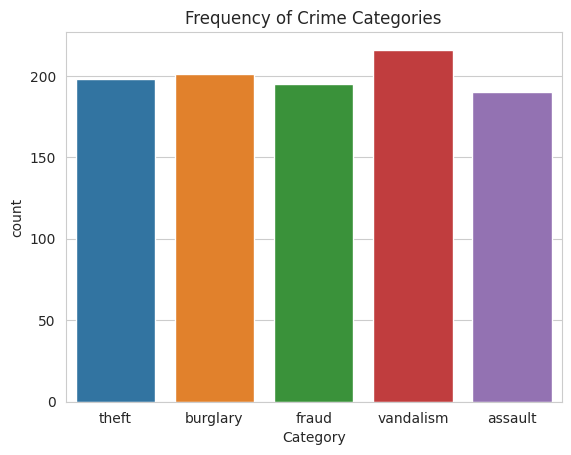

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of crime categories
sns.countplot(x='Category', data=df)
plt.title('Frequency of Crime Categories')
plt.show()

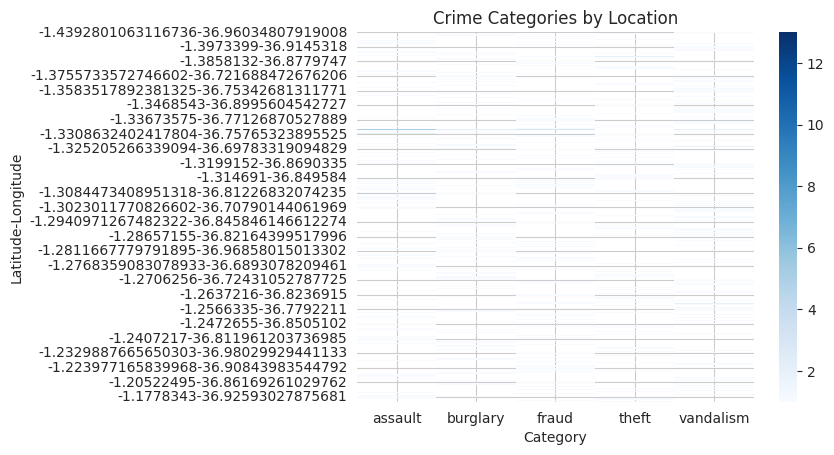

In [39]:
# Heatmap of crime categories by location
crime_location = df.groupby(['Latitude', 'Longitude'])['Category'].value_counts().unstack()
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Categories by Location')
plt.show()

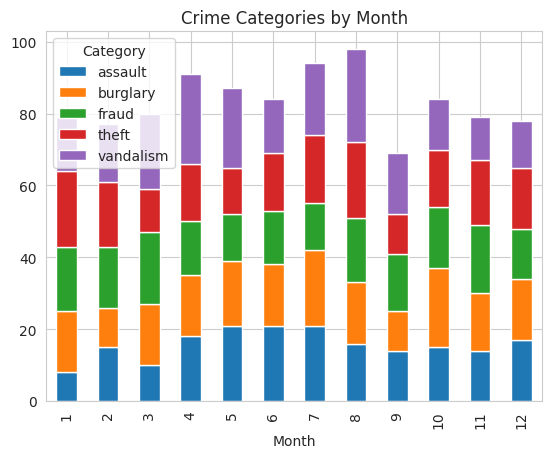

In [40]:

# Barplot of crime categories by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df_month = df.groupby(['Month', 'Category']).size().unstack()
df_month.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Month')
plt.show()

In [41]:
# Descriptive statistics of crime data
print(df.describe())

          Latitude    Longitude        Month
count  1000.000000  1000.000000  1000.000000
mean     -1.299496    36.827421     6.484000
std       0.055667     0.080393     3.374779
min      -1.439280    36.655003     1.000000
25%      -1.333030    36.765108     4.000000
50%      -1.303253    36.826368     7.000000
75%      -1.259650    36.892865     9.000000
max      -1.167070    36.995408    12.000000


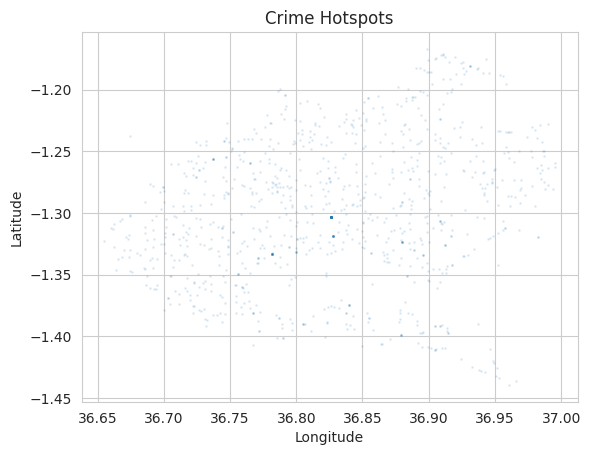

In [42]:
# Identify areas with high crime rates
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


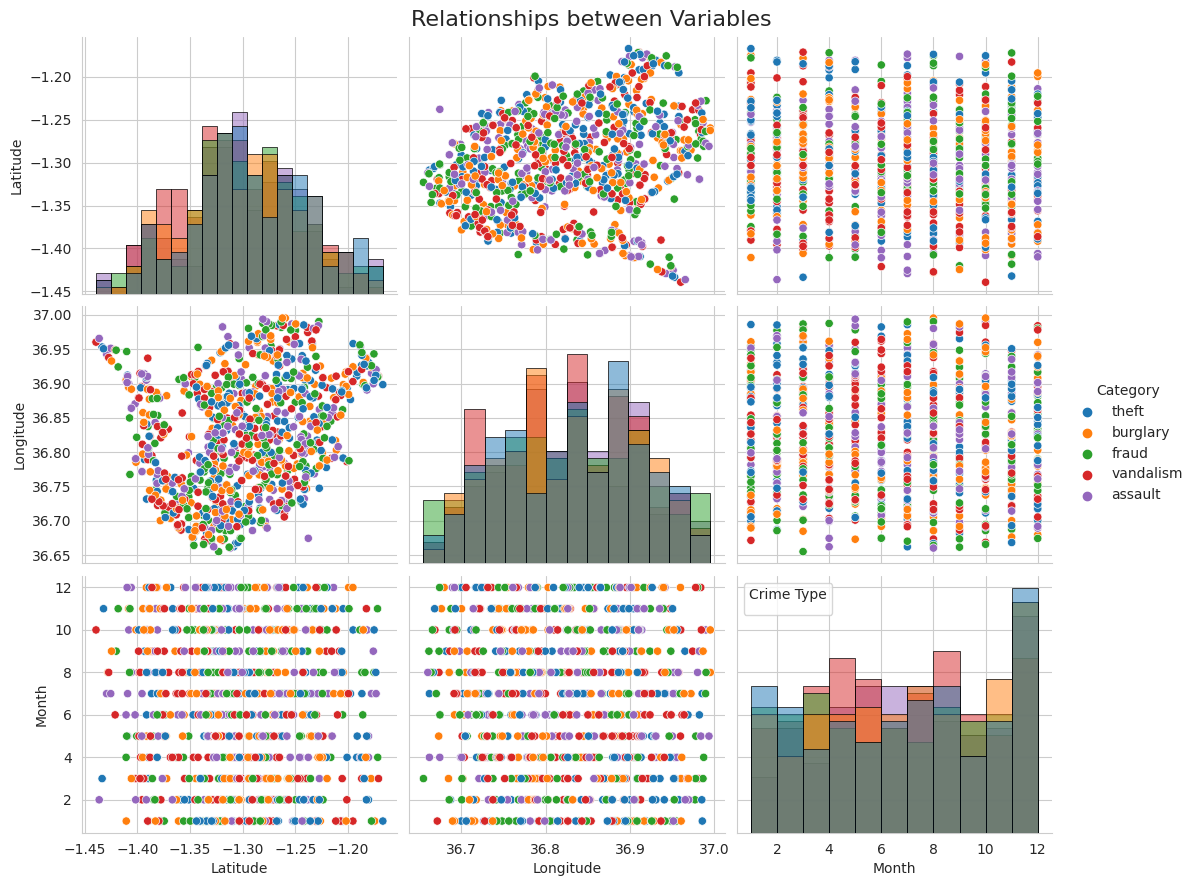

In [43]:
# Plot relationships between variables
sns.set_style("whitegrid")
sns.pairplot(df, hue='Category', height=3, aspect=1.2, diag_kind="hist", diag_kws=dict(edgecolor="k", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationships between Variables', fontsize=16)
plt.legend(title='Crime Type')
plt.show()


In [44]:
# Drop Date, Month and Category columns
df.drop(['Date', 'Month'], axis=1, inplace=True)
print(df.head())

    Category  Latitude  Longitude
0      theft -1.291096  36.699857
1      theft -1.272180  36.885631
2   burglary -1.332894  36.781666
3      fraud -1.410719  36.904783
4  vandalism -1.279435  36.794596


# Identify areas prone to crime
Next we'll count this reports to identify the number of crime reports made for a particular area. We'll then use this information to identify areas prone to crime. We'll also identify the type of crime that is most common in these areas. Our final table we'll have the Latitude, Longitude, Number of Reports, and the most common crime type.

Finally, we'll convert the resulting dataframe into a JSON file and save it as `data.json`. This JSON file we be accessed through an API endpoint. The data will be displayed on the SafeCity app on a map using the Google Maps API.

JSON Structure
```json
{
    "latitude": 37.7749,
    "longitude": -122.4194,
    "number_of_reported_crimes": 10,
    "crime_type": "theft"
}
```

In [45]:
import pandas as pd

# Group the data by Latitude and Longitude to get the number of reports made for each unique location.
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Number of Reports')

# Sort the data by the number of reports in descending order to identify the areas with the highest number of reported crimes.
location_counts = location_counts.sort_values(by='Number of Reports', ascending=False)

# Group the data again by Category, Latitude, and Longitude to get the count of each unique combination of crime type and location.
crime_counts = df.groupby(['Category', 'Latitude', 'Longitude']).size().reset_index(name='Count')

# Sort the data by the count in descending order to identify the most common crime types for each location.
crime_counts = crime_counts.sort_values(by=['Latitude', 'Longitude', 'Count'], ascending=[True, True, False])
crime_counts = crime_counts.groupby(['Latitude', 'Longitude']).first().reset_index()

# Merge the dataframes
final = pd.merge(location_counts, crime_counts, on=['Latitude', 'Longitude'], how='left')

# Drop rows with Nan values and duplicate rows
final.dropna(inplace=True)
final.drop_duplicates(inplace=True)
print(final.head())

# Convert this dataframe to a JSON file that can then be accessed by the SafeCity app.
final.to_json('data.json', orient='records')



   Latitude  Longitude  Number of Reports   Category  Count
0 -1.303253  36.826368                 41    assault     13
1 -1.332894  36.781666                 12    assault      5
2 -1.318837  36.827822                 11  vandalism      4
3 -1.323177  36.879560                  6   burglary      3
4 -1.256430  36.737476                  5      fraud      2


# TRAINING THE MODEL
The next step is to train the model that will be used to predict the likelihood of crime occuring in a given area.